In [105]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import collections
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r'C:\Users\krushank.shah\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col='customerID')

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [6]:
df.describe(include = object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [8]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,


In [10]:
len(df[df['TotalCharges'].isna()])

0

In [13]:
type('TotalCharges')

str

In [19]:
new_col = pd.to_numeric(df.iloc[:, 18], errors='coerce')
df.iloc[:, 18] = pd.Series(new_col)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.4+ MB


In [21]:
df.isnull().values.any()

True

In [28]:
df['TotalCharges'] = df['TotalCharges'].fillna((df['TotalCharges'].mean()))

In [29]:
df.isnull().values.any()

False

In [31]:
df_categorical = df.select_dtypes(include = object)

In [32]:
df_categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
customerID,,,,,,,,,,,,,,,,
7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [35]:
df_numerical = df.select_dtypes(include = ['int', 'float64'])

column_numerical = df_numerical.columns

In [36]:
df_numerical.head()

,MonthlyCharges,TotalCharges
customerID,,
7590-VHVEG,29.85,29.85
5575-GNVDE,56.95,1889.50
3668-QPYBK,53.85,108.15
7795-CFOCW,42.30,1840.75
9237-HQITU,70.70,151.65


In [44]:
def display_plot(df, col_to_exclude, object_mode = True):
    """
    This function plots the count or distribution of each column in the dataframe based on
    @Args
    df: pandas dataframe
    col_to_exclude: specific column to exclude from the plot, used for excluded key
    object_mode: whether to plot on object data types or not (default: True)
    Return
    No object returned but visualized plot will return based on specified inputs"""
    n = 0
    this = []
    if object_mode:
        nrows = 4
        ncols = 4
        width = 20
        height = 20
    else:
        nrows = 2
        ncols = 2
        width = 14
        height = 10

    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)
        else:
            if (df[column].dtypes != 'O'):
                this.append(column)

    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(width, height))
    for row in range(nrows):
        for col in range(ncols):
            if object_mode:
                g = sns.countplot(df[this[n]], ax=ax[row][col])
            else:
                g = sns.distplot(df[this[n]], ax = ax[row][col])
            ax[row,col].set_title("Column name: {}".format(this[n]))
            ax[row, col].set_xlabel("")
            ax[row, col].set_ylabel("")
            n += 1

    plt.show();
    return None

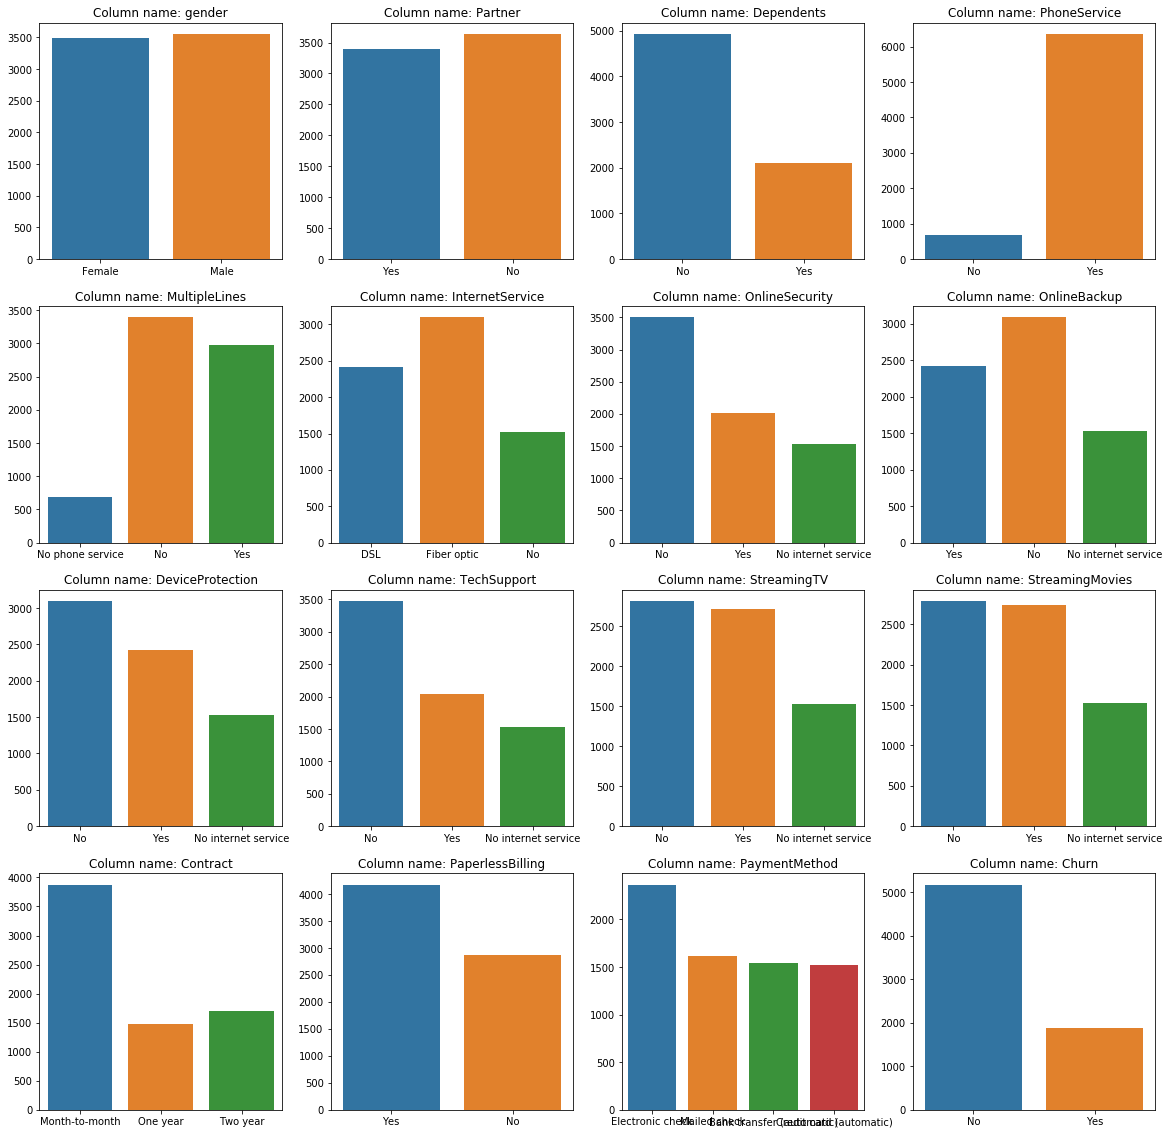

In [45]:
display_plot(df, 'customerid', object_mode = True)

C:\Users\krushank.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


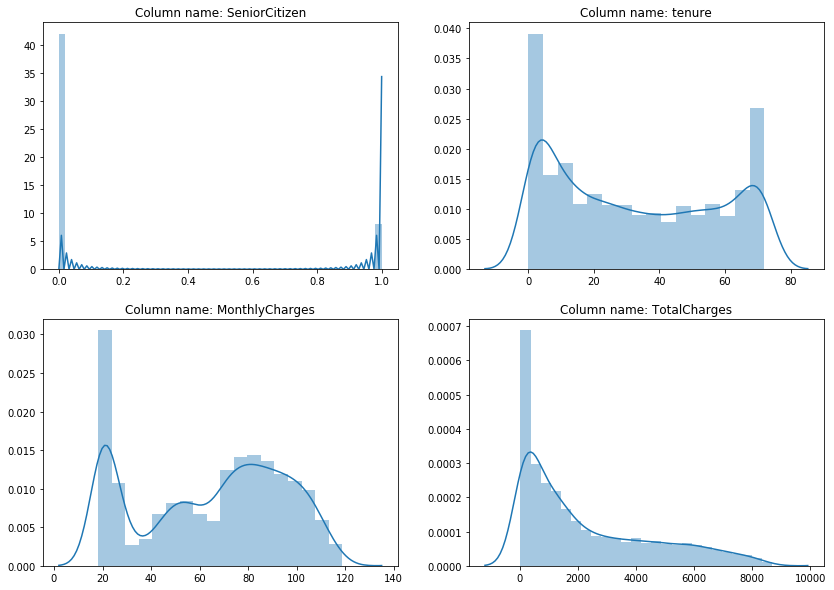

In [47]:
display_plot(df, 'customerid', object_mode = False)

In [48]:
pd.crosstab(index = df["PhoneService"], columns = df["MultipleLines"])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,682,0
Yes,3390,0,2971


In [49]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingTV"])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1464,0,957
Fiber optic,1346,0,1750
No,0,1526,0


In [52]:
#replace 'No internet service' to No for the following columns
replace_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No', 'No phone service' : 'No'})

In [51]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingTV"])

StreamingTV,No,Yes
InternetService,,
DSL,1464,957
Fiber optic,1346,1750
No,1526,0


In [53]:
pd.crosstab(index = df["PhoneService"], columns = df["MultipleLines"])

MultipleLines,No,Yes
PhoneService,,
No,682,0
Yes,3390,2971


In [72]:
pd.crosstab(index = df["gender"], columns = df["Churn"], margins = True)

Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


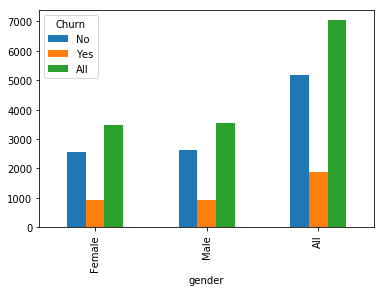

In [79]:
pd.crosstab(index = df["gender"], columns = df["Churn"], margins = True).plot.bar()

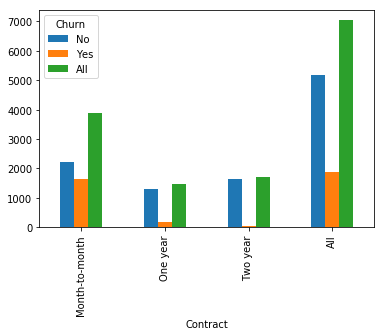

In [80]:
pd.crosstab(index = df["Contract"], columns = df["Churn"], margins = True).plot.bar()

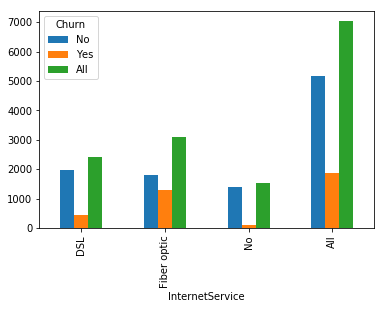

In [81]:
pd.crosstab(index = df["InternetService"], columns = df["Churn"], margins = True).plot.bar()

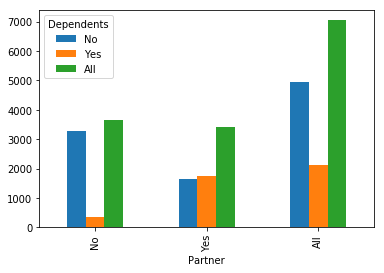

In [83]:
pd.crosstab(index = df["Partner"], columns = df["Dependents"], margins = True).plot.bar()

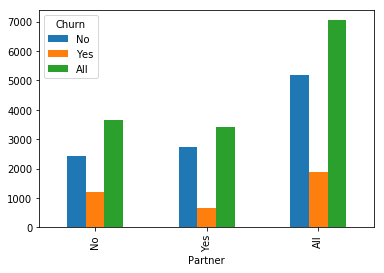

In [84]:
pd.crosstab(index = df["Partner"], columns = df["Churn"], margins = True).plot.bar()

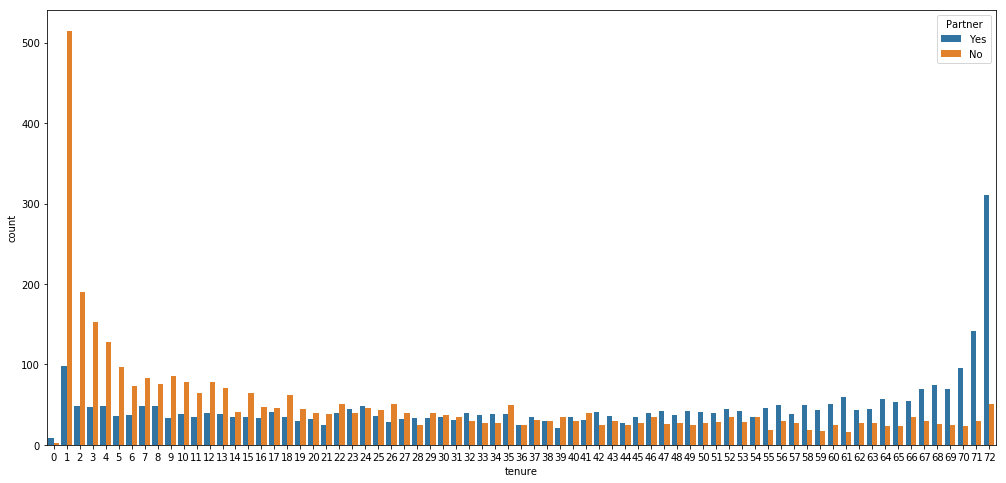

In [85]:
plt.figure(figsize=(17,8))
sns.countplot(x=df['tenure'],hue=df.Partner);

In [87]:
pd.crosstab(index = df["Partner"], columns = df["Churn"], margins = True)

Churn,No,Yes,All
Partner,,,
No,2441,1200,3641
Yes,2733,669,3402
All,5174,1869,7043


In [89]:
pd.crosstab(index = df["SeniorCitizen"], columns = df["Churn"], margins = True)

Churn,No,Yes,All
SeniorCitizen,,,
0,4508,1393,5901
1,666,476,1142
All,5174,1869,7043


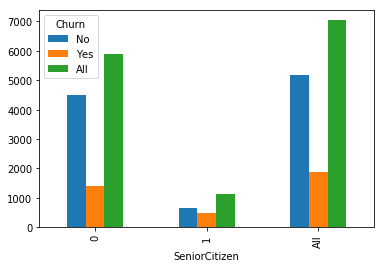

In [90]:
pd.crosstab(index = df["SeniorCitizen"], columns = df["Churn"], margins = True).plot.bar()

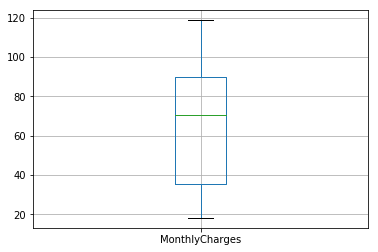

In [91]:
df.boxplot('MonthlyCharges');

In [94]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

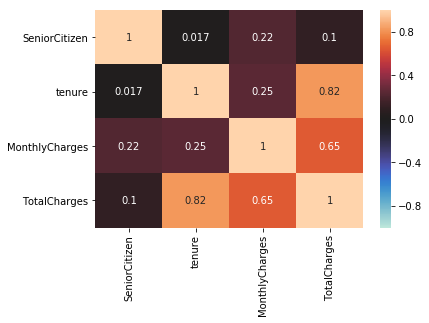

In [99]:
sns.heatmap(df[["SeniorCitizen","tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot = True, vmin=-1, vmax=1, center= 0)

In [100]:
#Tenure to categorical column
def tenure_lab(telcom) :
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
df["tenure_group"] = df.apply(lambda x:tenure_lab(x),axis = 1)

In [101]:
#replace values
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [108]:
#customer id col
Id_col = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols )


In [110]:
scale_vars = ['tenure', 'MonthlyCharges']
scaler = Normalizer() 
df[scale_vars] = scaler.fit_transform(df[scale_vars])
df[scale_vars].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,0.414551,0.844866
std,0.282215,0.186330
min,0.000000,0.258915
25%,0.148897,0.787579
50%,0.421731,0.906721
75%,0.616214,0.988853
max,0.965900,1.000000


In [112]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group_Tenure_0-12', 'tenure_group_Tenure_12-24',
       'tenure_group_Tenure_24-48', 'tenure_group_Tenure_48-60',
       'tenure_group_Tenure_gt_60'],
      dtype='object')

In [113]:
X = df.drop('Churn', axis = 1)
y= df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify = y, random_state = 42)

In [115]:
from sklearn.dummy import DummyClassifier

# Feature Selection and Encoding
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer, MinMaxScaler, OneHotEncoder, label_binarize

# Machine learning
from sklearn import model_selection
from sklearn.svm import SVC 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

In [116]:
# validation
from sklearn import metrics

In [117]:
# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [118]:
# Metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

In [119]:
#utilities
import time
import io, os, sys, types, time, datetime, math, random

In [120]:
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier,
                          SVC,
                          GaussianNB, 
                          DecisionTreeClassifier,
                          RandomForestClassifier,
                          SGDClassifier,
                          AdaBoostClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [121]:
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [122]:
accuracy = clf.score(X_test, y_test)
accuracy

0.73450070989115

In [124]:

preds = clf.predict(X_test)
# dummyistic Regression

start_time = time.time()

train_pred_dummy, test_pred_dummy, acc_dummy, acc_cv_dummy,probs_dummy = fit_ml_algo(DummyClassifier(strategy='most_frequent', random_state=0),X_train, y_train, X_test, 10)

dummy_time = (time.time() - start_time)

print("Accuracy: %s" % acc_dummy)
print("Accuracy CV 10-Fold: %s" % acc_cv_dummy)
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time))
print (metrics.classification_report(y_train, train_pred_dummy))
print (metrics.classification_report(y_test, test_pred_dummy))

Accuracy: 73.45
Accuracy CV 10-Fold: 73.47
Running Time: 0:00:07.666662
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3622
           1       0.00      0.00      0.00      1308

   micro avg       0.73      0.73      0.73      4930
   macro avg       0.37      0.50      0.42      4930
weighted avg       0.54      0.73      0.62      4930

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

   micro avg       0.73      0.73      0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



C:\Users\krushank.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\krushank.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\krushank.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\krushank.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F

In [125]:
train_pred_log, test_pred_log, acc_log, acc_cv_log,probs_log = fit_ml_algo(LogisticRegression(random_state=42),
                                                                                          X_train, y_train, X_test,10)

train_pred_sgdc, test_pred_sgdc, acc_sgdc, acc_cv_sgdc,probs_sgdc = fit_ml_algo(SGDClassifier(loss = 'log',random_state=42),
                                                                                          X_train, y_train, X_test,10)
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt,probs_dt = fit_ml_algo(DecisionTreeClassifier(random_state=42),
                                                                                          X_train, y_train, X_test, 10)
train_pred_svc, test_pred_svc, acc_svc, acc_cv_svc,probs_svc = fit_ml_algo(SVC(probability=True,random_state=42),
                                                                                          X_train, y_train, X_test, 10)
train_pred_nb, test_pred_nb, acc_nb, acc_cv_nb,probs_nb = fit_ml_algo(GaussianNB(),
                                                                                          X_train, y_train, X_test, 10)
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn,probs_knn = fit_ml_algo(KNeighborsClassifier(),
                                                                                          X_train, y_train, X_test, 10)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf,probs_rf = fit_ml_algo(RandomForestClassifier(random_state=42),
                                                                                          X_train, y_train, X_test,10 )
train_pred_gbc, test_pred_gbc, acc_gbc, acc_cv_gbc,probs_gbc = fit_ml_algo(GradientBoostingClassifier(random_state=42),
                                                                                          X_train, y_train, X_test, 10)

C:\Users\krushank.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\krushank.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\krushank.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\U

In [126]:
models = pd.DataFrame({
    'Model': ['LogisticRegression', 'SGDClassifier', 
              'DecisionTreeClassifier', 'LinearSVC', 
              'GaussianNB', 'KNeighborsClassifier', 
              'RandomForestClassifier', 'GradientBoostingClassifier'],
    'Score': [
        acc_log, 
        acc_sgdc, 
        acc_dt, 
        acc_svc, 
        acc_nb, 
        acc_knn, 
        acc_rf,
        acc_gbc
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,GradientBoostingClassifier,80.22
0,LogisticRegression,80.17
6,RandomForestClassifier,77.76
3,LinearSVC,76.15
5,KNeighborsClassifier,75.01
1,SGDClassifier,73.45
4,GaussianNB,72.55
2,DecisionTreeClassifier,72.36


In [127]:

models = pd.DataFrame({
    'Model': ['LogisticRegression', 'SGDClassifier', 
              'DecisionTreeClassifier', 'LinearSVC', 
              'GaussianNB', 'KNeighborsClassifier', 
              'RandomForestClassifier', 'GradientBoostingClassifier'],
    'Score': [
        acc_cv_log, 
        acc_cv_sgdc, 
        acc_cv_dt, 
        acc_cv_svc, 
        acc_cv_nb, 
        acc_cv_knn, 
        acc_cv_rf,
        acc_cv_gbc
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,GradientBoostingClassifier,80.63
0,LogisticRegression,80.37
6,RandomForestClassifier,77.83
3,LinearSVC,75.03
4,GaussianNB,73.69
5,KNeighborsClassifier,73.59
2,DecisionTreeClassifier,72.64
1,SGDClassifier,45.31


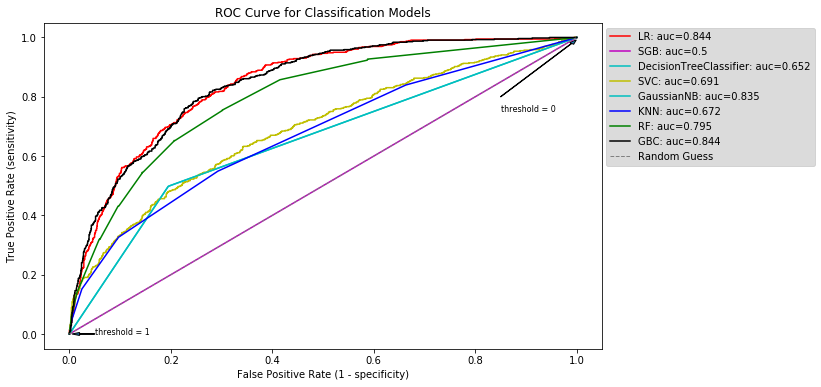

In [128]:
plt.figure(figsize =(10,6))

lr_fpr, lr_tpr, lr_thresh = roc_curve(y_test, probs_log)
plt.plot(lr_fpr,lr_tpr,label="LR: auc="+str(round(roc_auc_score(y_test, probs_log), 3)),
         color = 'r')

sgb_fpr, sgb_tpr, sgb_thresh = roc_curve(y_test, probs_sgdc)
plt.plot(sgb_fpr,sgb_tpr,label="SGB: auc="+str(round(roc_auc_score(y_test, probs_sgdc), 3)),
         color = 'm')

dt_fpr, dt_tpr, dt_thresh = roc_curve(y_test, probs_dt)
plt.plot(dt_fpr,dt_tpr,label="DecisionTreeClassifier: auc="+str(round(roc_auc_score(y_test, probs_dt), 3)),
         color = 'c')

svc_fpr, svc_tpr, svc_thresh = roc_curve(y_test, probs_svc)
plt.plot(svc_fpr,svc_tpr,label="SVC: auc="+str(round(roc_auc_score(y_test, probs_svc), 3)),
         color = 'y')

nb_fpr, nb_tpr, nb_thresh = roc_curve(y_test, probs_nb)
plt.plot(dt_fpr,dt_tpr,label="GaussianNB: auc="+str(round(roc_auc_score(y_test, probs_nb), 3)),
         color = 'c')

knn_fpr, knn_tpr, knn_thresh = roc_curve(y_test, probs_knn)
plt.plot(knn_fpr,knn_tpr,label="KNN: auc="+str(round(roc_auc_score(y_test, probs_knn), 3)),
         color = 'blue')

rf_fpr, rf_tpr, rf_thresh = roc_curve(y_test, probs_rf)
plt.plot(rf_fpr,rf_tpr,label="RF: auc="+str(round(roc_auc_score(y_test, probs_rf), 3)),
         color = 'green')

gbc_fpr, gbc_tpr, gbc_thresh = roc_curve(y_test, probs_gbc)
plt.plot(gbc_fpr,gbc_tpr,label="GBC: auc="+str(round(roc_auc_score(y_test, probs_gbc), 3)),
         color = 'k')

plt.plot([0, 1], [0, 1], color='gray', lw = 1, linestyle='--', 
         label = 'Random Guess')

plt.legend(loc = 'upper right',bbox_to_anchor=(1.39,1), frameon = True, facecolor = 'lightgray')
plt.title('ROC Curve for Classification Models')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.text(0.85,0.75, 'threshold = 0', fontsize = 8)
plt.arrow(0.85,0.8, 0.14,0.18, head_width = 0.01)
plt.text(0.05,0, 'threshold = 1', fontsize = 8)
plt.arrow(0.05,0, -0.03,0, head_width = 0.01)
plt.show()

In [129]:
#tuning the gradient boosted tree
gbc = GradientBoostingClassifier(random_state = 42)
gbc.fit(X_train, y_train)

# Set up hyperparameter grid for tuning
param_grid = {'n_estimators' : [200, 300, 400, 500],
                  'learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4],
                  'max_depth' : [3, 4, 5, 6, 7],
                  'min_samples_split': [2, 5, 10, 20],
                  'min_weight_fraction_leaf': [0.001, 0.01, 0.05],
                  'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                  'max_features': ['sqrt', 'log2']}

## Tune hyperparamters
gbc_cv = RandomizedSearchCV(gbc, param_distributions = param_grid, cv = 10, 
                            random_state = 42, n_iter = 20)

## Fit SGB to training data
gbc_cv.fit(X_train, y_train)

## Get info about best hyperparameters
print("Tuned GBC Parameters: {}".format(gbc_cv.best_params_))
print("Best GBC Training Score:{}".format(gbc_cv.best_score_)) 

## Predict SGB on test data
print("GBC Test Performance: {}".format(gbc_cv.score(X_test, y_test)))

## Obtain model performance metrics
gbc_pred_prob = gbc_cv.predict_proba(X_test)[:,1]
gbc_auroc = roc_auc_score(y_test, gbc_pred_prob)
print("SGB AUROC: {}".format(gbc_auroc))
gbc_y_pred = gbc_cv.predict(X_test)
print(classification_report(y_test, gbc_y_pred))

Tuned GBC Parameters: {'subsample': 0.9, 'n_estimators': 300, 'min_weight_fraction_leaf': 0.01, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.01}
Best GBC Training Score:0.8089249492900609
GBC Test Performance: 0.8012304779933743
SGB AUROC: 0.8469647582556923
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.67      0.49      0.57       561

   micro avg       0.80      0.80      0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



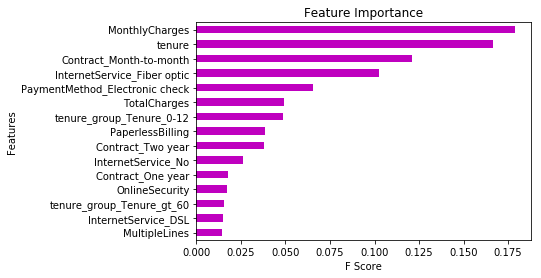

In [130]:
gbc_ = gbc_cv.best_estimator_
importances = pd.Series(gbc_.feature_importances_, index=X_train.columns)
importances.nlargest(15).sort_values(ascending = True).plot(kind='barh', color = 'm')
plt.title('Feature Importance')
plt.xlabel('F Score')
plt.ylabel('Features')
plt.show()

Looking at the areas under the curve, we see that the Gradient boosting tree and Logistic Regression models perform the best, with an AUC of 0.844; the worst model is the Stochastic gradient Classifier, which has AUC of 0.5. Thus the performance of Gradient boosting tree and Logistic Regression models are generally quite similar.